 **1. Importing the required libraries for EDA**

In [311]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
# %matplotlib inline     
sns.set(color_codes=True)

**2. Loading the data into the data frame.**

In [312]:
df = pd.read_csv("/kaggle/input/employee-dataset/Employee.csv")
# To display the top 5 rows 
df.head(5) 

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [313]:
df.tail(5) 

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0
4652,Bachelors,2015,Bangalore,3,33,Male,Yes,4,0


**3. Checking the types of data**

In [314]:
df.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

**4. Dropping irrelevant columns**

In [315]:
df = df.drop(['Education', 'JoiningYear', 'City', 'Age', 'Gender'], axis=1)
df.head(4)

,PaymentTier,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,3,No,0,0
1,1,No,3,1
2,3,No,2,0
3,3,No,5,1


**5. Renaming the columns**

In [316]:
df = df.rename(columns={"PaymentTier": "Pay", "EverBenched": "Benched", "ExperienceInCurrentDomain": "Experience", "LeaveOrNot": "LeaveOrNot"})
df.head(5)

,Pay,Benched,Experience,LeaveOrNot
0,3,No,0,0
1,1,No,3,1
2,3,No,2,0
3,3,No,5,1
4,3,Yes,2,1


**6. Dropping the duplicate rows**

In [317]:
df.shape

(4653, 4)

In [318]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (4578, 4)


In [319]:
df.count()   

Pay           4653
Benched       4653
Experience    4653
LeaveOrNot    4653
dtype: int64

In [320]:
df = df.drop_duplicates()
df.head(5)

,Pay,Benched,Experience,LeaveOrNot
0,3,No,0,0
1,1,No,3,1
2,3,No,2,0
3,3,No,5,1
4,3,Yes,2,1


In [321]:
df.count()

Pay           75
Benched       75
Experience    75
LeaveOrNot    75
dtype: int64

**7. Dropping the missing or null values**

In [322]:
print(df.isnull().sum())

Pay           0
Benched       0
Experience    0
LeaveOrNot    0
dtype: int64


In [323]:
df = df.dropna()    # Dropping the missing values.
df.count()

Pay           75
Benched       75
Experience    75
LeaveOrNot    75
dtype: int64

In [324]:
print(df.isnull().sum())

Pay           0
Benched       0
Experience    0
LeaveOrNot    0
dtype: int64


**Scatterplot**

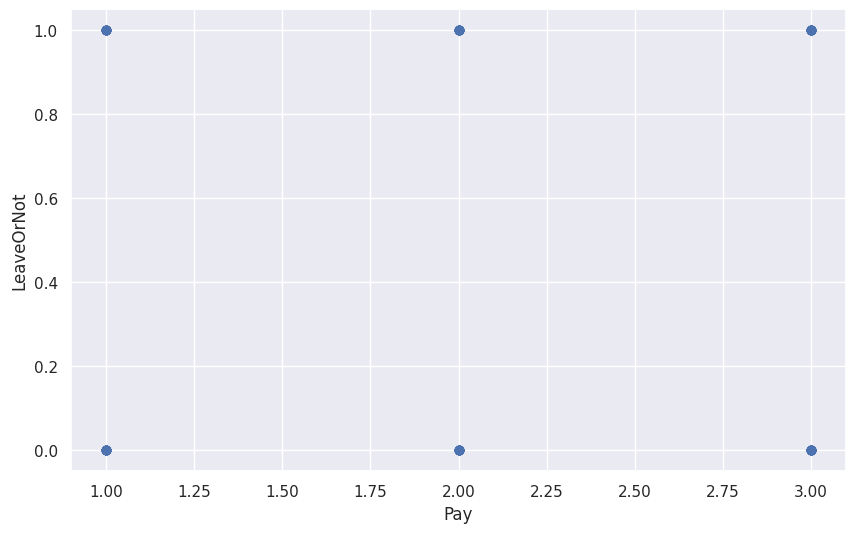

In [325]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Pay'], df['LeaveOrNot'])
ax.set_xlabel('Pay')
ax.set_ylabel('LeaveOrNot')
plt.show()